## Insurance Claim Fraud Detection

Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

Independent Variables
1.	months_as_customer: Number of months of patronage
2.	age: the length of time a customer has lived or a thing has existed
3.	policy_number: It is a unique id given to the customer, to track the subscription status and other details of customer
4.	policy_bind_date:date which document that is given to customer after we accept your proposal for insurance
5.	policy_state: This identifies who is the insured, what risks or property are covered, the policy limits, and the policy period
6.	policy_csl: is basically Combined Single Limit
7.	policy_deductable: the amount of money that a customer is responsible for paying toward an insured loss
8.	policy_annual_premium: This means the amount of Regular Premium payable by the Policyholder in a Policy Year
9.	umbrella_limit: This means extra insurance that provides protection beyond existing limits and coverages of other policies
10.	insured_zip: It is the zip code where the insurance was made
11.	insured_sex: This refres to either of the two main categories (male and female) into which customer are divided on the basis of their reproductive functions
12.	insured_education_level: This refers to the Level of education of the customer
13.	insured_occupation: This refers Occupation of the customer
14.	insured_hobbies: This refers to an activity done regularly by customer in his/her leisure time for pleasure.
15.	insured_relationship: This whether customer is: single; or. married; or. in a de facto relationship (that is, living together but not married); or. in a civil partnership
16.	capital-gains: This refers to profit accrued due to insurance premium
17.	capital-loss: This refers to the losses incurred due to insurance claims
18.	incident_date: This refers to the date which claims where made by customers
19.	incident_type: This refers to the type of claim/vehicle damage made by customer
20.	collision_type: This refers to the area of damage on the vehicle
21.	incident_severity: This refers to the extent/level of damage
22.	authorities_contacted: This refers to the government agencies that were contacted after damage
23.	incident_state: This refers to the state at which the accident happened
24.	incident_city: This refers to the city at which the accident happened
25.	1ncident_location: This refers to the location at which the accident happened
26.	incident_hour_of_the_day: The period of the day which accident took place
27.	number_of_vehicles_involved: This refers to number of vehicles involved the accident
28.	property_damage: This refers to whether property was damaged or not
29.	bodily_injuries: This refers to injuries sustained
30.	witnesses: This refers to the number of witnesses involved
31.	police_report_available: This refers to whether the report on damage was documented or not
32.	total_claim_amount: This refers to the financial implications involved in claims
33.	injury_claim: This refers to physical injuries sustained
34.	property_claim: This refers to property damages during incident
35.	vehicle_claim: This refers to property damages during incident
36.	auto_make: This refers to the make of the vehicle
37.	auto_model: This refers to the model of the vehicle
38.	auto_year: This refers to the year which the vehicle was manufactured
39.	_c39:
40.	fraud_reported

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Dataset Link

https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score, auc

from sklearn.model_selection import cross_val_score

## Data Collection

In [2]:
insurance_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
insurance_df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


Observation:
            1. Label (i.e. "fraud_reported") contains classification data so this is a Classification 
               Problem.
            2. Binary Classification Problem
            3. To predict whether an insurance claim is fraudulent or not. 

## Exploratory Data Analysis

In [3]:
insurance_df.shape

(1000, 40)

In [4]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
insurance_df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

## Drop Column not needed

In [6]:
insurance_df.shape

(1000, 40)

In [7]:
# 'policy_number', '_c39' column not needed for prediction of 'fraud_reported'

insurance_df.drop(['policy_number', '_c39'], axis = 1, inplace = True)

In [8]:
insurance_df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [9]:
insurance_df.shape

(1000, 38)

## Handle Null values

In [10]:
insurance_df.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involv

In [11]:
insurance_df.isna().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

Observation:
            1. There are no NULL values

In [12]:
insurance_df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

## Number of uniques values in each column

In [13]:
insurance_df.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involv

In [14]:
insurance_df.nunique().to_frame("No. of Unique Values")

,No. of Unique Values
months_as_customer,391
age,46
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995
insured_sex,2


In [15]:
# check the value counts of each column

for i in insurance_df.columns:
    print(insurance_df[i].value_counts())
    print('\n')

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64


OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


1000    351
500     342
2000    3

Observation:
            1. There are '?' uniques values in the three columns 'collision_type', 'property_damage', 
               'police_report_available'
            2. Need to handle '?' these values

## check for any records - which has '?'

In [16]:
insurance_df.loc[insurance_df['collision_type'] == '?']

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
13,121,34,26-10-2012,OH,100/300,1000,936.61,0,464652,FEMALE,...,1,NO,7280,1120,1120,5040,Toyota,Highlander,2010,N
26,257,43,20-09-1990,IN,100/300,2000,1322.10,0,436984,MALE,...,3,YES,9020,1640,820,6560,Toyota,Camry,2005,N
27,202,34,18-07-2002,IN,100/300,500,848.07,3000000,607730,MALE,...,1,?,5720,1040,520,4160,Suburu,Forrestor,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,163,37,25-11-2009,IN,500/1000,1000,1200.33,4000000,477631,FEMALE,...,1,YES,3900,390,780,2730,Volkswagen,Jetta,2008,Y
969,398,55,25-05-1990,OH,250/500,500,862.19,0,606858,MALE,...,3,?,6600,600,1200,4800,Accura,MDX,2012,N
983,17,39,28-10-2006,IL,250/500,1000,840.95,0,431202,FEMALE,...,1,?,3440,430,430,2580,Suburu,Legacy,2002,N
994,141,30,24-03-2007,IN,500/1000,1000,1347.04,0,430665,MALE,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N


Observation:
            1. there are 178 rows values in the column 'collision_type' have "?"

In [17]:
insurance_df.loc[insurance_df['property_damage'] == '?']

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
6,137,34,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,03-02-1990,IL,100/300,1000,1137.03,0,603195,MALE,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
16,70,26,08-06-2005,OH,500/1000,1000,1199.44,5000000,619884,MALE,...,2,YES,52110,5790,5790,40530,Nissan,Maxima,2012,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,124,28,08-12-2001,OH,250/500,1000,1235.14,0,443567,MALE,...,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N
994,141,30,24-03-2007,IN,500/1000,1000,1347.04,0,430665,MALE,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N
997,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


Observation:
            1. there are 360 rows values in the column 'property_damage' have "?"

In [18]:
insurance_df.loc[insurance_df['police_report_available'] == '?']

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
6,137,34,04-06-2000,IN,250/500,1000,1333.35,0,441716,MALE,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
9,212,42,25-07-2011,IL,100/300,500,1315.68,0,600983,MALE,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N
10,235,42,26-05-2002,OH,100/300,500,1253.12,4000000,462283,FEMALE,...,2,?,87010,7910,15820,63280,Ford,F150,2002,N
20,460,62,25-06-2002,IN,250/500,1000,1187.96,4000000,618845,MALE,...,0,?,47160,0,5240,41920,Suburu,Impreza,2011,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,22,21,04-07-2007,IN,250/500,1000,1248.05,0,443550,FEMALE,...,2,?,53280,5920,0,47360,Chevrolet,Malibu,2015,N
993,124,28,08-12-2001,OH,250/500,1000,1235.14,0,443567,MALE,...,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N
995,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N


Observation:
            1. there are 343 rows values in the column 'police_report_available' have "?"

## Handle "?" values 

In [19]:
insurance_df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses           

Observation:
            1. There are 178 rows values in the column 'collision_type' have "?"
            2. There are 360 rows values in the column 'property_damage' have "?"
            3. There are 343 rows values in the column 'police_report_available' have "?"

In [20]:
insurance_df.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involv

Observation:
            1. The columns 'collision_type', 'property_damage' and 'police_report_available' are 
               object type 
            2. First replace with NULL values and then replace all NULL values using mode 

In [21]:
insurance_df['collision_type'] = insurance_df['collision_type'].replace('?', np.nan)

insurance_df['property_damage'] = insurance_df['property_damage'].replace('?', np.nan)

insurance_df['police_report_available'] = insurance_df['police_report_available'].replace('?', np.nan)

In [22]:
insurance_df.isin(['?']).sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

Observation:
            1. In the columns 'collision_type', 'property_damage' and 'police_report_available' - the 
               '?' values are replaced with NULL values

In [23]:
insurance_df.isnull().sum() 

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses           

In [24]:
insurance_df.loc[insurance_df['collision_type'] == '?']

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported


In [25]:
insurance_df.loc[insurance_df['property_damage'] == '?']

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported


In [26]:
insurance_df.loc[insurance_df['police_report_available'] == '?']

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported


In [27]:
for i in ['collision_type', 'property_damage', 'police_report_available']:
    print(insurance_df[i].value_counts() )
    print('\n')

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


NO     338
YES    302
Name: property_damage, dtype: int64


NO     343
YES    314
Name: police_report_available, dtype: int64




In [28]:
insurance_df.isnull().sum()  

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses           

In [29]:
# Handle all features Null values - Object type

for i in ['collision_type', 'property_damage', 'police_report_available']:
        insurance_df[i] = insurance_df[i].fillna(insurance_df[i].mode()[0])

In [30]:
insurance_df.isnull().sum() 

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

Observation:
            1. There are no NULL values

## check for any blank records

In [31]:
for i in insurance_df.columns:
    print(insurance_df.loc[insurance_df[i] == ' '])

Empty DataFrame
Columns: [months_as_customer, age, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported]
Index: []

[0 rows x 38 columns]
Empty DataFrame
Columns: [months_as_customer, age, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incid

Observation:
            1. checked all 38 columns but none have any blank values

## check the duplicate values in rows

In [33]:
insurance_df.shape

(1000, 38)

In [34]:
insurance_df.duplicated().sum()

0

In [35]:
insurance_df.shape

(1000, 38)

Observation:
            1. No duplicate values in rows 

In [36]:
insurance_df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Observations:
            1. No missing values
            2. Mean value is > median value so it is right skew and postively correlated
            3. There are huge difference betwen 75% and max and hence looks like there are quite 
                more number of outliers

In [37]:
insurance_df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


## Date cannnot be object type - it should be datetime type, so convert

In [38]:
insurance_df.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involv

Observation:
            1. There are two date columns - 'policy_bind_date' and 'incident_date'. Convert it 
                to datetime type

In [40]:
insurance_df.policy_bind_date.min()

'01-01-2006'

In [41]:
insurance_df.policy_bind_date.max()

'31-12-2012'

In [42]:
insurance_df.incident_date.min()

'01-01-2015'

In [43]:
insurance_df.incident_date.max()

'31-01-2015'

In [44]:
insurance_df['policy_bind_date'] = pd.to_datetime(insurance_df.policy_bind_date, format = "%d-%m-%Y")

In [45]:
insurance_df['incident_date'] = pd.to_datetime(insurance_df.incident_date, format = "%d-%m-%Y")

In [46]:
insurance_df['policy_bind_date'].dtype

dtype('<M8[ns]')

In [47]:
insurance_df['incident_date'].dtype

dtype('<M8[ns]')

In [48]:
insurance_df.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                    

In [49]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   object        
 4   policy_csl                   1000 non-null   object        
 5   policy_deductable            1000 non-null   int64         
 6   policy_annual_premium        1000 non-null   float64       
 7   umbrella_limit               1000 non-null   int64         
 8   insured_zip                  1000 non-null   int64         
 9   insured_sex                  1000 non-null   object        
 10  insured_education_level      1000 non-null   object        
 11  insured_occupation           1000 non-null  

In [50]:
insurance_df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [51]:
insurance_df.shape

(1000, 38)

## Data Visualization

In [52]:
insurance_df.shape

(1000, 38)

In [53]:
# seperating numerical and categorical columns

cat_col = []
for i in insurance_df.dtypes.index:
    if insurance_df.dtypes[i] == 'object':
        cat_col.append(i)
print("Categorical Column", cat_col)
print("\n")


num_col = []
for i in insurance_df.dtypes.index:
    if insurance_df.dtypes[i] != 'object':
        num_col.append(i)
print("Numerical Column", num_col)

Categorical Column ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Numerical Column ['months_as_customer', 'age', 'policy_bind_date', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_date', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


Observations:
            1. There are 19 categorical columnms and 19 numerical columns

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


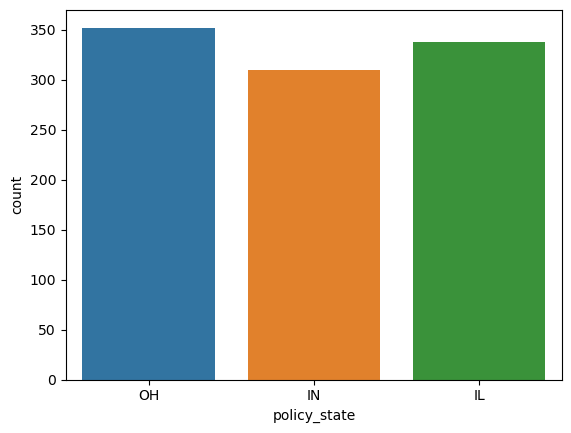

In [65]:
# Univariate Analysis

sns.countplot(x = 'policy_state', data = insurance_df)
print(insurance_df.policy_state.value_counts())

Observation:
            1. more number of policy_state - OH 

NO     686
YES    314
Name: police_report_available, dtype: int64


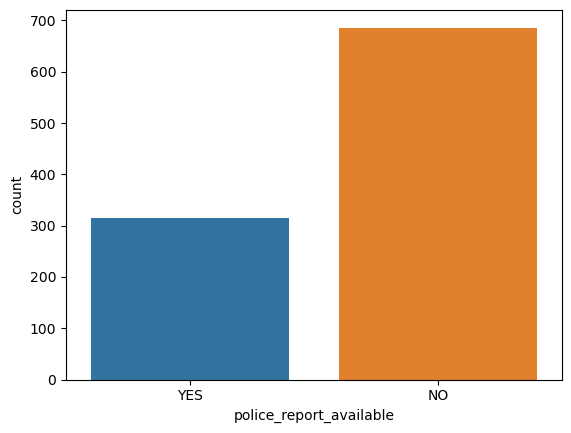

In [55]:
# Univariate Analysis

sns.countplot(x = 'police_report_available', data = insurance_df)
print(insurance_df.police_report_available.value_counts())

Observation:
            1. There are more number of police_report_available 'No' - 686

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


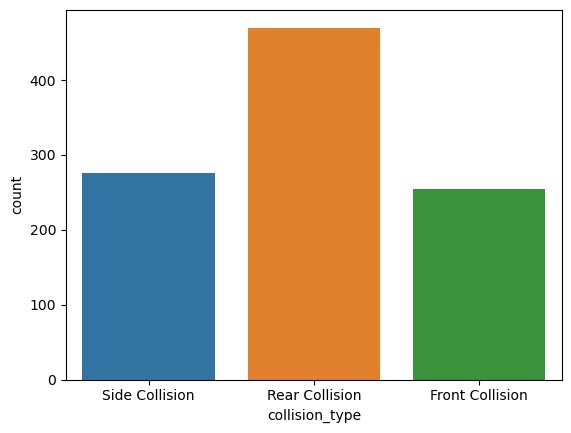

In [57]:
# Univariate Analysis

sns.countplot(x = 'collision_type', data = insurance_df)
print(insurance_df.collision_type.value_counts())

Observation:
            1. More number of Rear Collision type -  470

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


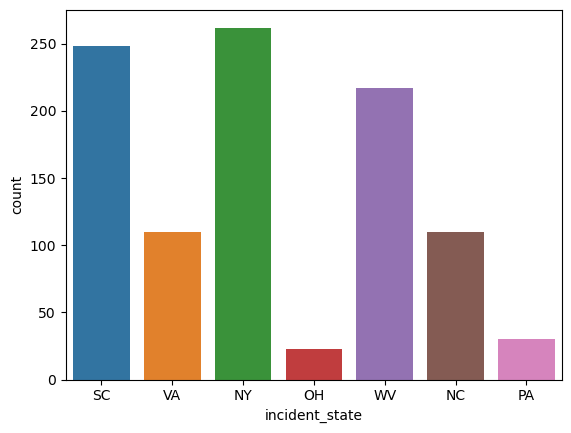

In [58]:
# Univariate Analysis

sns.countplot(x = 'incident_state', data = insurance_df)
print(insurance_df.incident_state.value_counts())

Observation:
            1. More number of incident in NY   

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


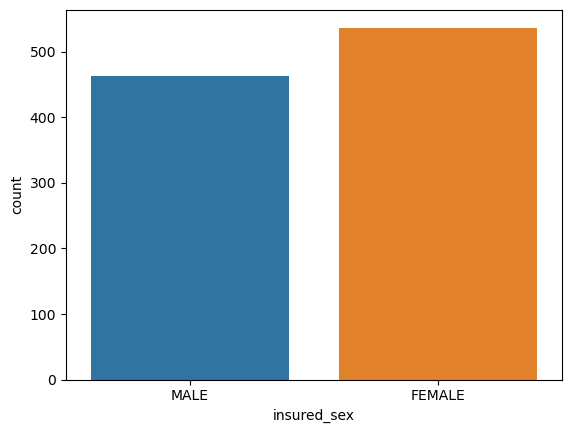

In [59]:
# Univariate Analysis

sns.countplot(x = 'insured_sex', data = insurance_df)
print(insurance_df.insured_sex.value_counts())

Observation:
            1. More number of female insured   

NO     698
YES    302
Name: property_damage, dtype: int64


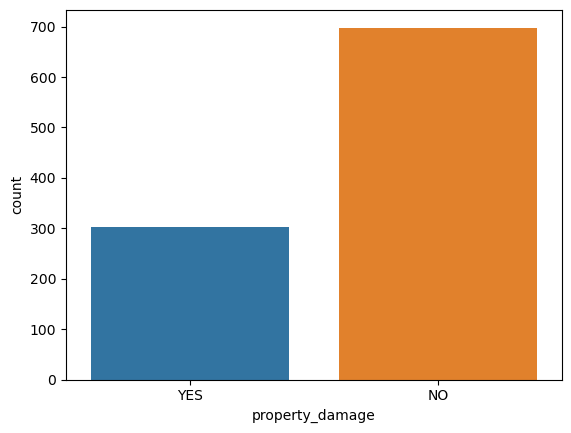

In [60]:
# Univariate Analysis

sns.countplot(x = 'property_damage', data = insurance_df)
print(insurance_df.property_damage.value_counts())

Observation:
            1. No much property_damage   

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


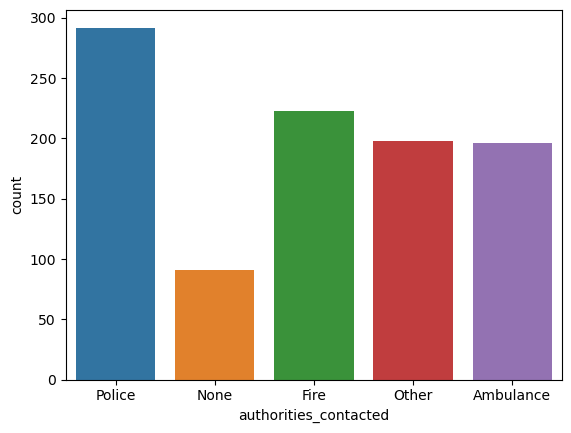

In [62]:
# Univariate Analysis

sns.countplot(x = 'authorities_contacted', data = insurance_df)
print(insurance_df.authorities_contacted.value_counts())

Observation:
            1. More number of times police were contacted   

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


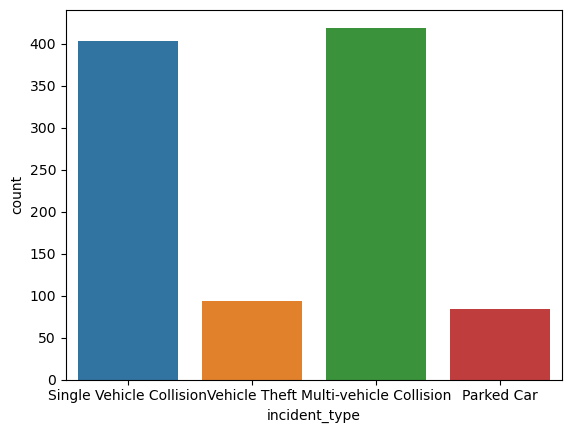

In [63]:
# Univariate Analysis

sns.countplot(x = 'incident_type', data = insurance_df)
print(insurance_df.incident_type.value_counts())

Observation:
            1. More number of Multi-vehicle Collision 

N    753
Y    247
Name: fraud_reported, dtype: int64


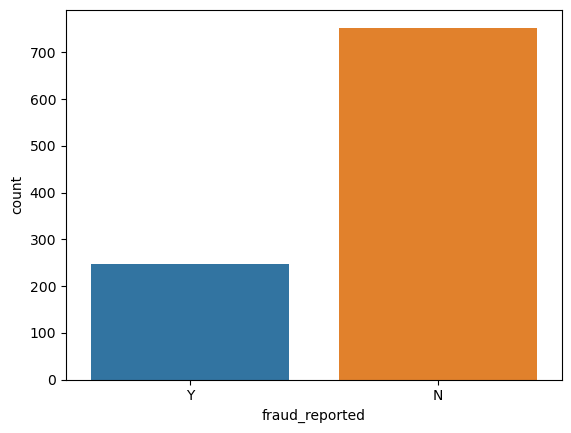

In [66]:
# Univariate Analysis

sns.countplot(x = 'fraud_reported', data = insurance_df)
print(insurance_df.fraud_reported.value_counts())

Observation:
            1. No more number of fraud reported 
            2. Data is imbalanced, need to do data balancing.

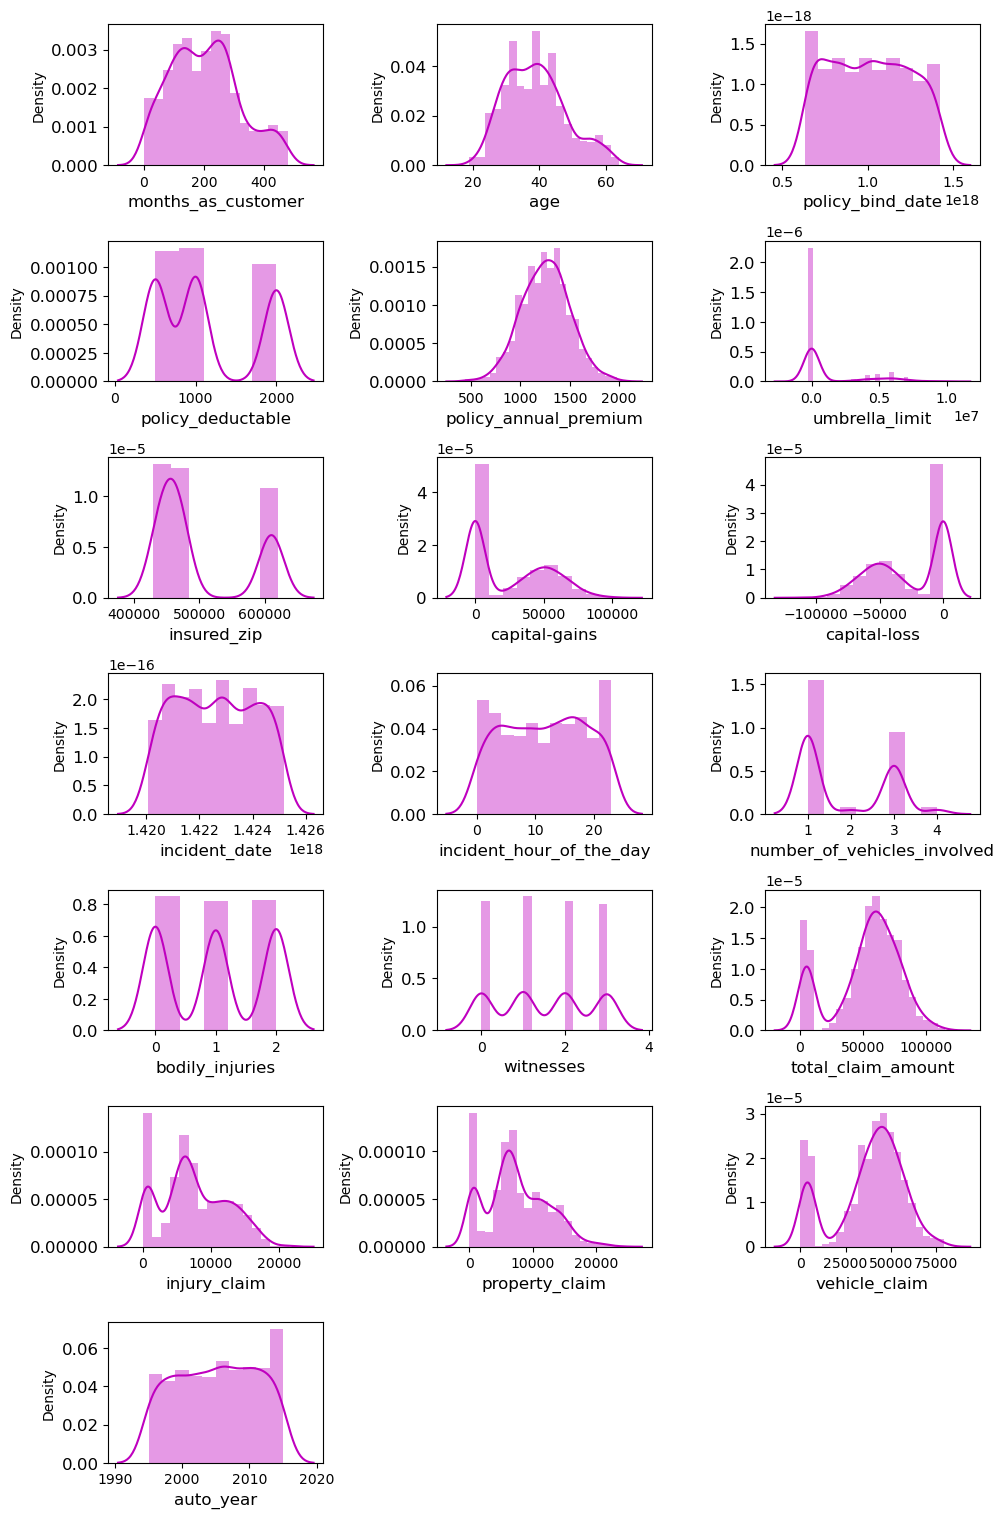

In [68]:
# lets see how data is distributed for each numerical column

plt.figure(figsize=(10, 17))
p = 1
for i in num_col:
    if p <= 19:
        ax = plt.subplot(8, 3, p)
        sns.distplot(insurance_df[i], color = 'm')
        plt.xlabel(i, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observation:
            1. The continuous data are moderately normally distributed. 
            2. There are outliers
            3. We need to deal with skewness in the data 

In [69]:
insurance_df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [70]:
insurance_df.shape

(1000, 38)

In [71]:
insurance_df.nunique()

months_as_customer              391
age                              46
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries             

## Feature Encoding

In [74]:
# Convert Object data type to int type

insurance_df.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                    

In [77]:
insurance_df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [78]:
cat_col

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [79]:
from sklearn.preprocessing import LabelEncoder

label_enc =  LabelEncoder()

In [80]:
for i in cat_col:
    insurance_df[i] = label_enc.fit_transform(insurance_df[i])

In [81]:
insurance_df.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                            int32
policy_csl                              int32
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                             int32
insured_education_level                 int32
insured_occupation                      int32
insured_hobbies                         int32
insured_relationship                    int32
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                           int32
collision_type                          int32
incident_severity                       int32
authorities_contacted                   int32
incident_state                    

Observation:
            1. Converted all Object data type to int type

## Check for Multicollinearity

In [82]:
# get coefficient of one variable with all the other variables

cor = insurance_df.corr()
cor

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,-0.000833,...,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,-0.000292,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,...,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,0.008777,-0.020481,-0.034327,...,0.022960,0.069017,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.002114,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,-0.010757,0.009153,...,0.071500,-0.001645,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.033082,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.015217,...,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.019715,...,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.019357,...,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,-0.036942,0.016079,...,0.019805,0.009841,-0.033873,-0.017495,-0.006841,-0.041083,-0.020892,0.023637,-0.032736,0.019368
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,-0.036942,1.000000,0.009002,...,0.042463,0.006992,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,-0.028247,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.016079,0.009002,1.000000,...,0.019211,0.051640,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808


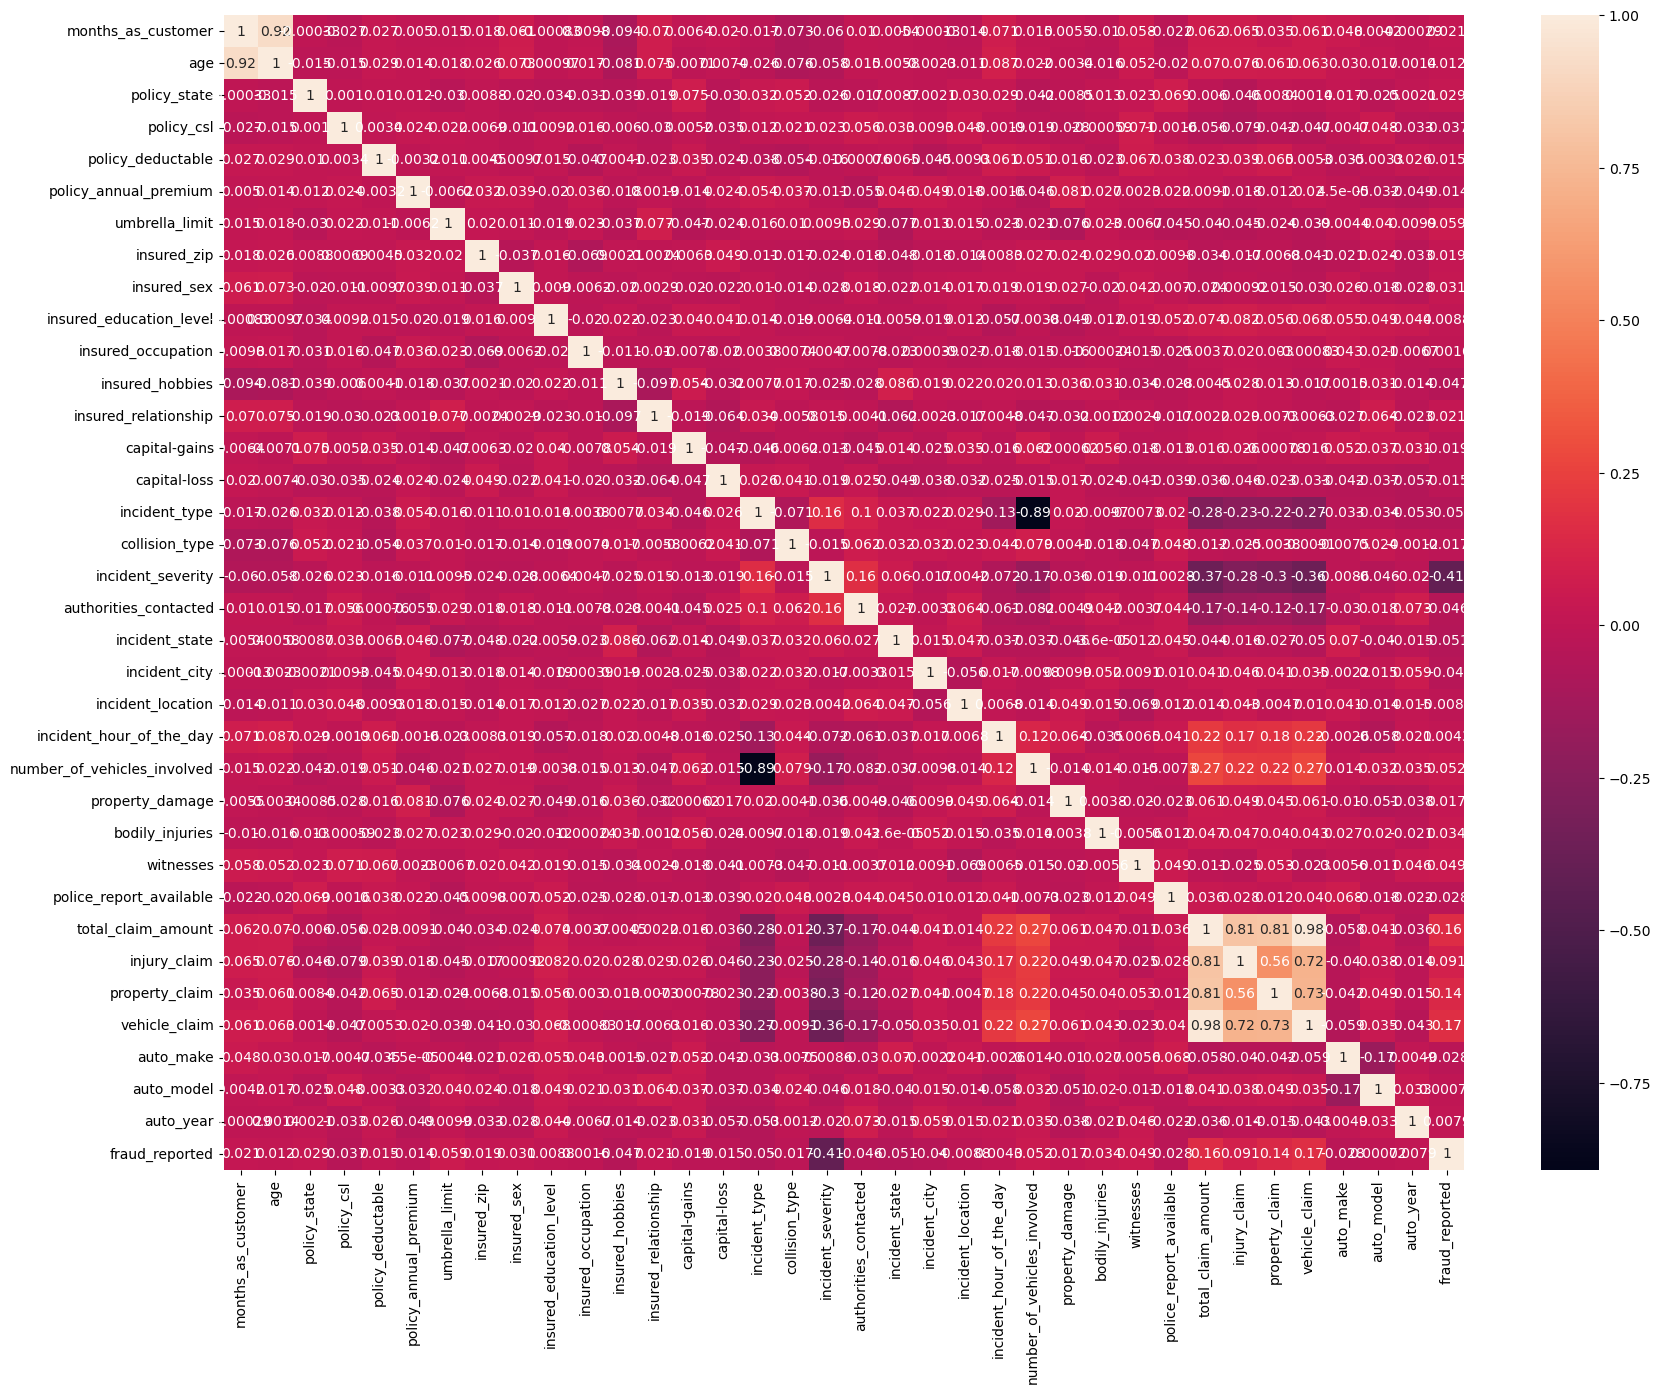

In [86]:
# visualize correlation using heatmap

plt.figure(figsize = (20, 15))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

Observation:
            1. feature v/s feature - 'months_as_customer' v/s 'age' has more positive correlation 
                0.92. This shows there might be multicollinearity issue but we need one more 
               proof so will plot scatter plot and check

In [84]:
insurance_df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

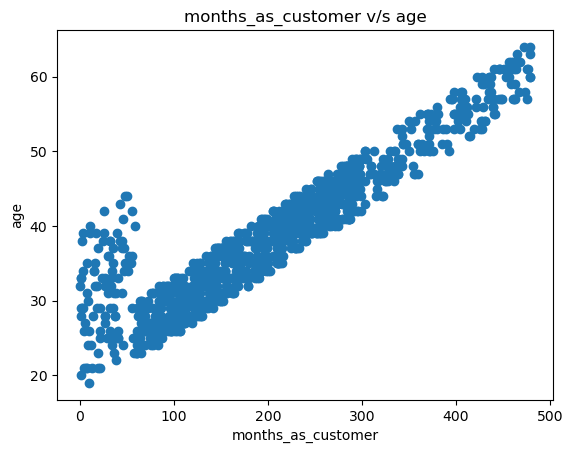

In [87]:
# one more proof so will plot scatter plot and check

plt.scatter(insurance_df['months_as_customer'], insurance_df.age)
plt.xlabel("months_as_customer")
plt.ylabel("age")
plt.title("months_as_customer v/s age")
plt.show()

Observation:
            1. feature v/s feature - 'months_as_customer' v/s 'age' from this scatter plot, we got to
               know that there is multicollinearity issue between these two features - 
               as 'months_as_customer' increases 'age' value increases - positive correlation

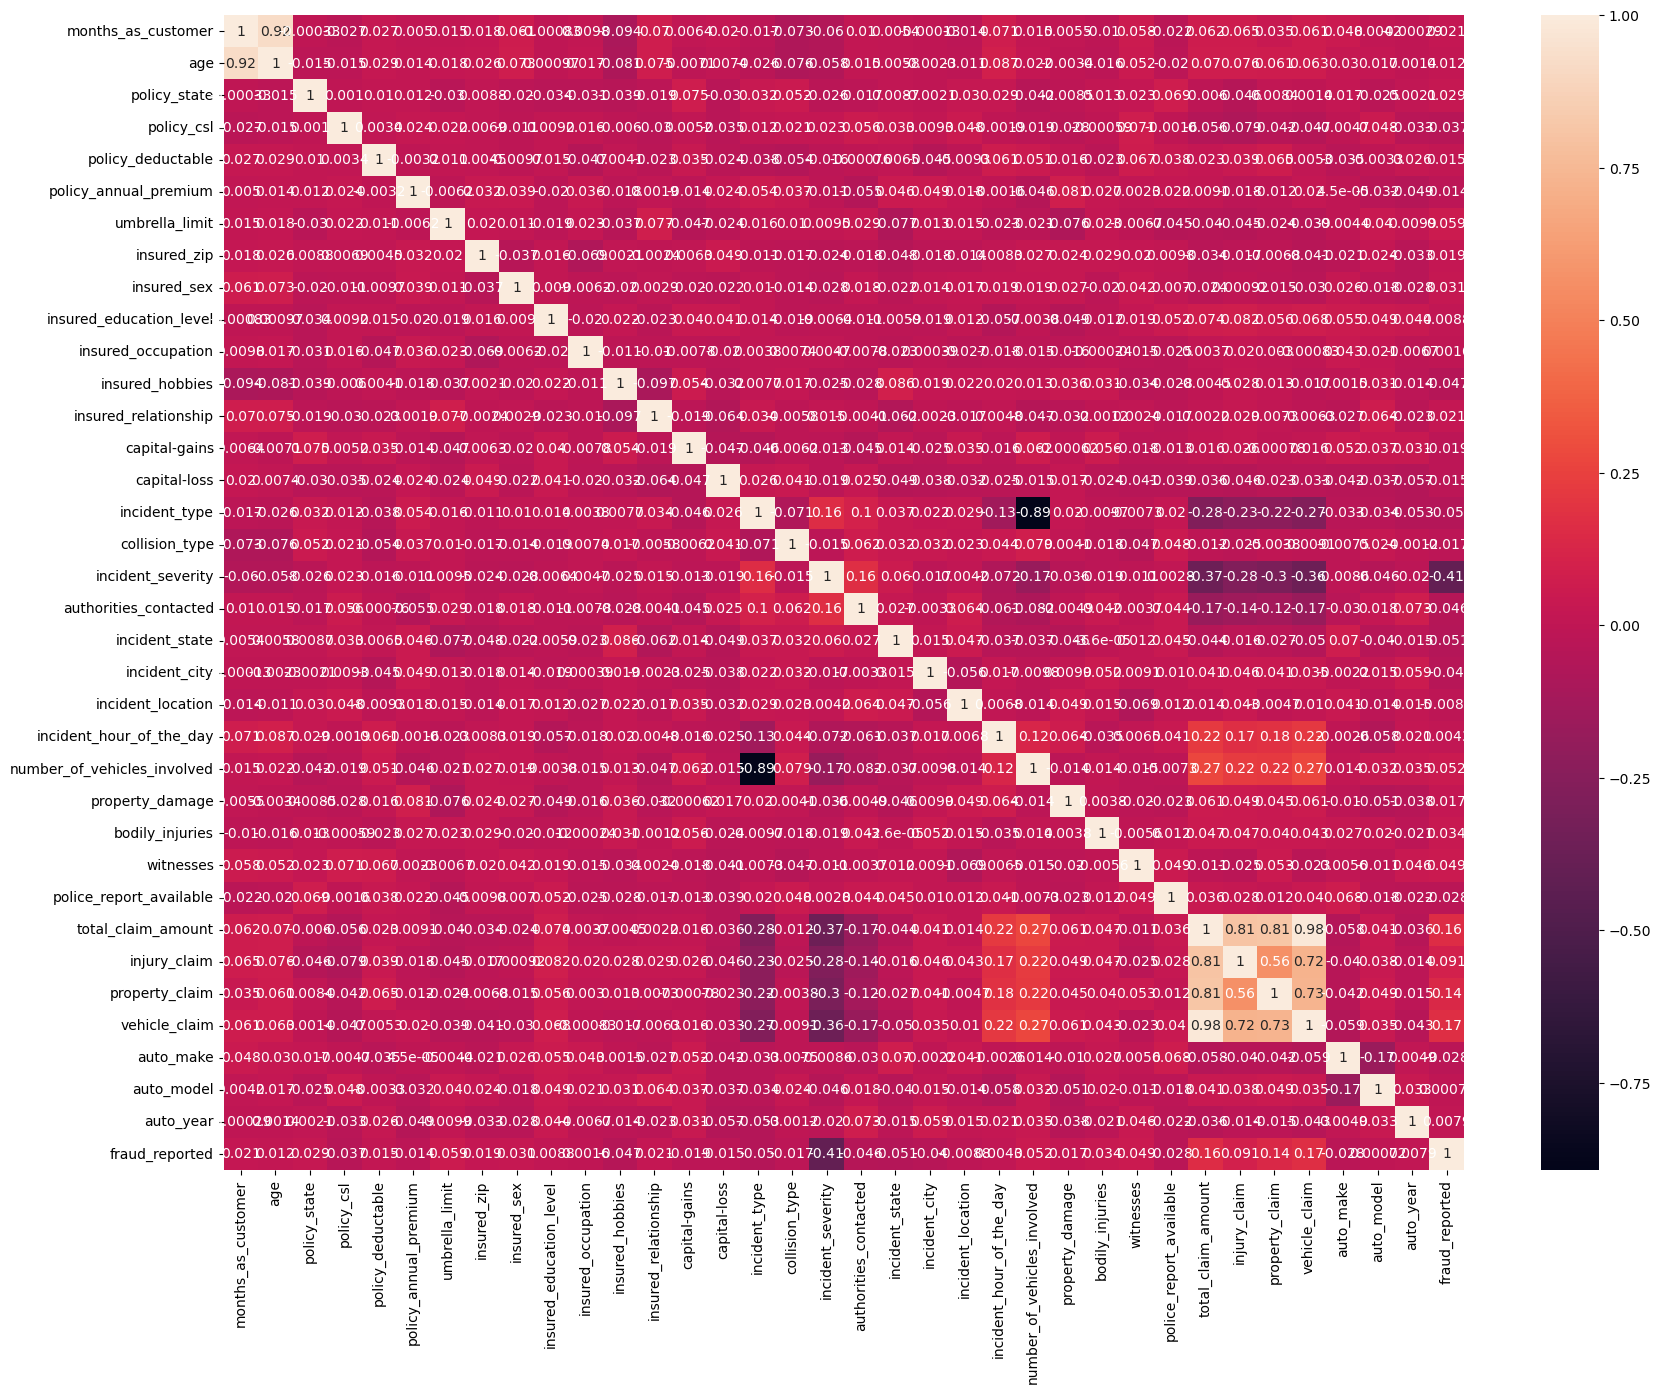

In [88]:
# visualize correlation using heatmap

plt.figure(figsize = (20, 15))
sns.heatmap(cor, annot = True, annot_kws = {'size' : 10})
plt.show()

In [ ]:
Observation:
            1. feature v/s label - 'months_as_customer' v/s 'fraud_reported' is 0.020544 and 'age' v/s 
               'fraud_reported' is 0.012143 from this heatmap 
                we get to know 'months_as_customer' is contributing more to 'fraud_reported' than 
                'age'. so we can remove 'age' feature. But we will do still more better feature selection
            

## Drop Column not needed

In [90]:
cat_col

['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [94]:
# 'insured_hobbies' will not help to predict insurance fraud detection

insurance_df.drop(["insured_hobbies"], axis = 1, inplace = True)
insurance_df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,2,1,1000,1406.91,0,466132,1,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,2006-06-27,1,1,2000,1197.22,5000000,468176,1,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2000-09-06,2,0,2000,1413.14,5000000,430632,0,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,1990-05-25,0,1,2000,1415.74,6000000,608117,0,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,2014-06-06,0,2,1000,1583.91,6000000,610706,1,...,1,0,6500,1300,650,4550,0,31,2009,0


In [95]:
insurance_df.shape

(1000, 37)

## Checking Outliers

In [97]:
# we dont check outliers for labels and categorocal column so remove it

insurance_df_features = insurance_df.drop(['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported'], axis = 1)

In [100]:
# remove dates

insurance_df_features = insurance_df.drop(['policy_bind_date', 'incident_date'], axis = 1)

In [101]:
insurance_df_features.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,466132,1,4,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,...,1,0,6500,1300,650,4550,0,31,2009,0


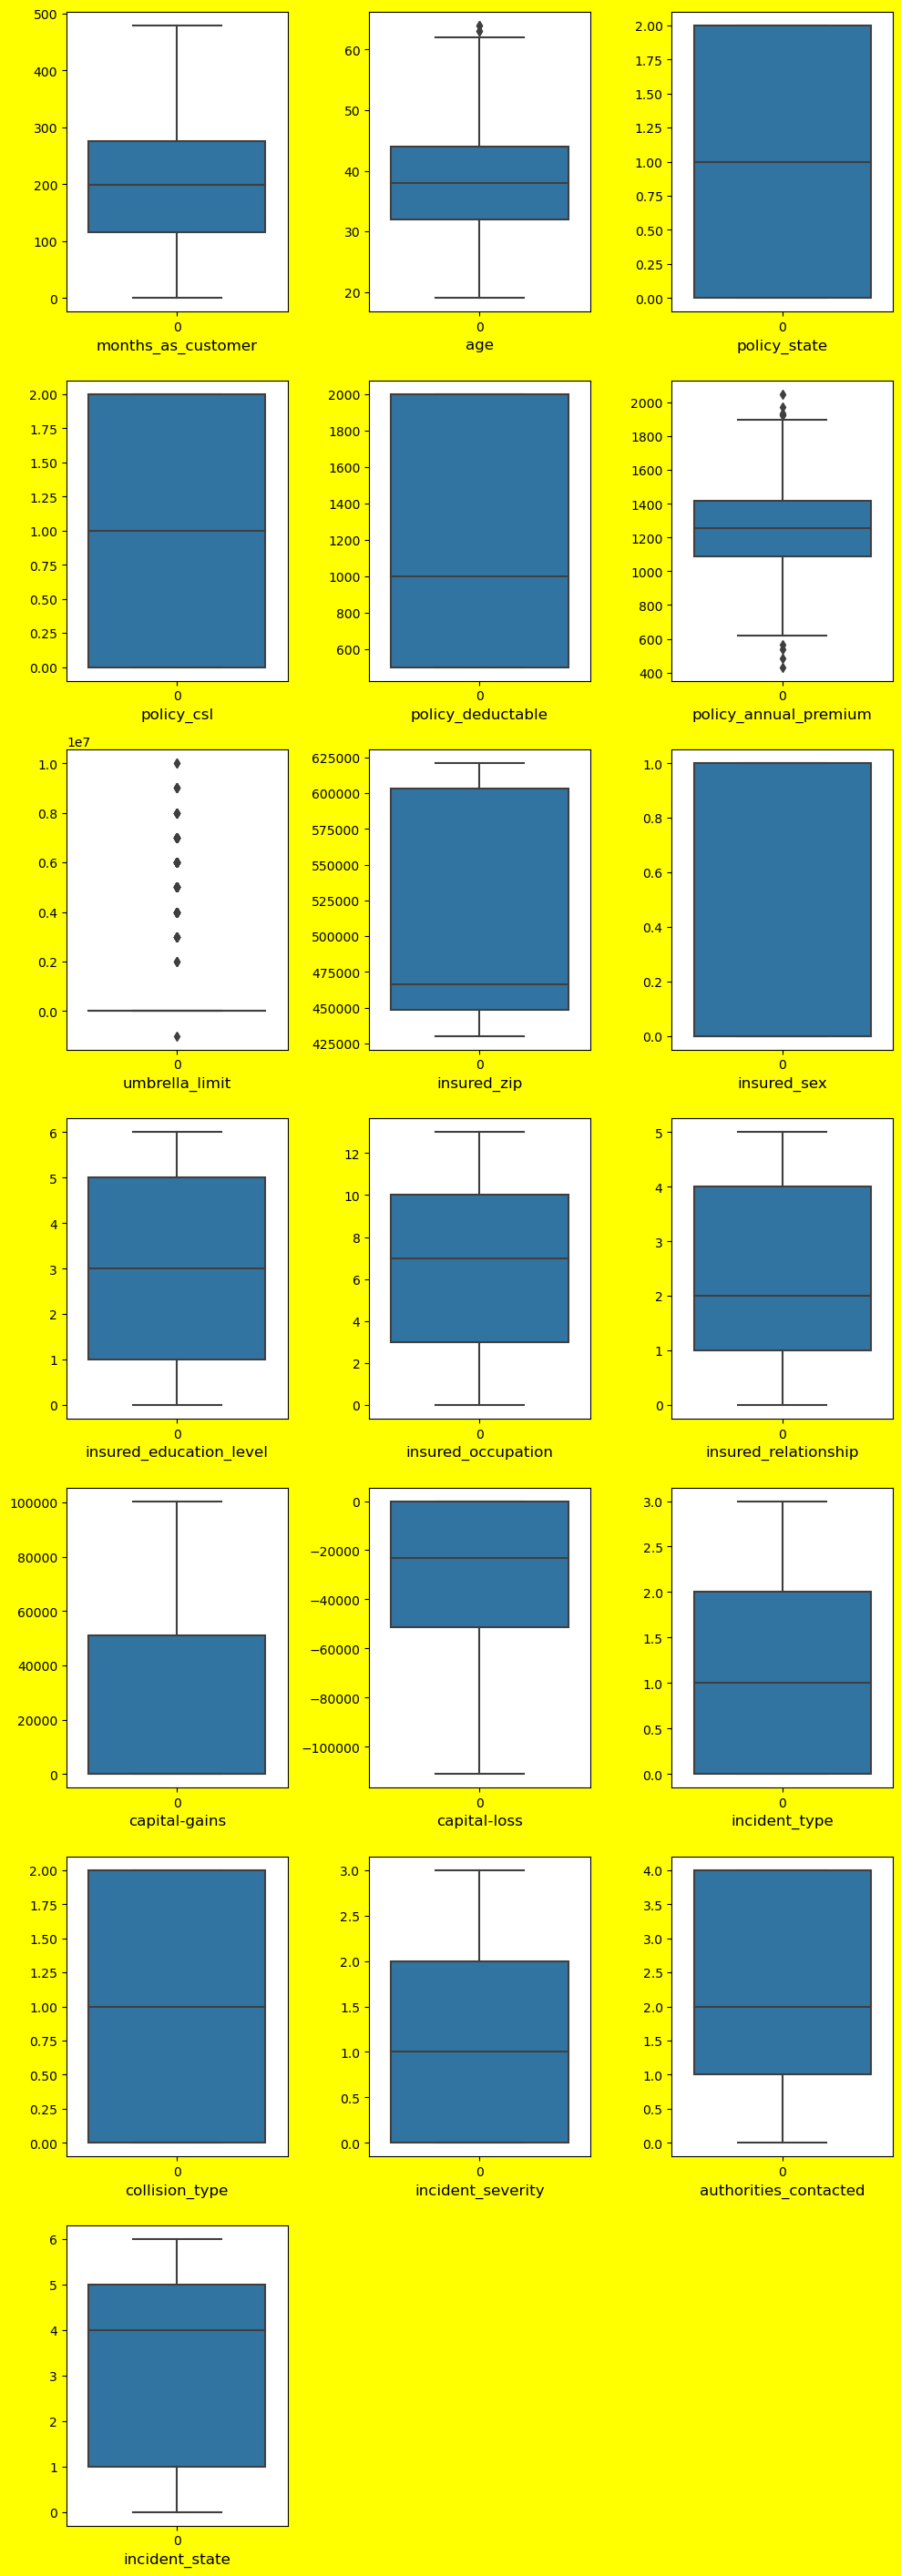

In [102]:
# Visualize the outliers using boxplot

plt.figure(figsize=(10,32), facecolor = 'yellow')
p = 1
for i in insurance_df_features:
    if p <= 19:
        ax = plt.subplot(8, 3, p)
        sns.boxplot(data = insurance_df_features[i])
        plt.xlabel(i, fontsize = 12)
    p = p + 1
plt.tight_layout()

Observations:
            1. No much Outliers found in almost all numerical features. 
            2. In column - 'policy_annual_premium' there are outliers 
            2. As we have only 1000 rows we are not going to remove the outliers

In [103]:
insurance_df_features.shape

(1000, 35)

## Checking for Skewness

In [104]:
insurance_df.skew() # not in the range -0.5 to +0.5

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777


In [105]:
# removing for skewness

insurance_df['umbrella_limit'] = np.cbrt(insurance_df['umbrella_limit'])


In [106]:
insurance_df.skew() # not in the range -0.5 to +0.5

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.523380
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777


Observation: 
            1. There are no much skewness

In [107]:
insurance_df.shape

(1000, 37)

## Another way to choose the best feature

In [108]:
from sklearn.feature_selection import SelectKBest, f_classif

In [109]:
insurance_df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [116]:
# Seperate features and labels

x = insurance_df.drop(['fraud_reported', 'policy_bind_date', 'incident_date'], axis = 1)
y = insurance_df.fraud_reported

In [117]:
x.shape

(1000, 34)

In [118]:
y.shape

(1000,)

In [119]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

In [120]:
best_features = SelectKBest(score_func = f_classif, k = 10)

In [121]:
fit = best_features.fit(x, y)

In [124]:
df_scores = pd.DataFrame(fit.scores_)
df_scores

,0
0,0.421370
1,0.147188
2,0.865237
3,1.382236
4,0.219163
5,0.209284
6,3.618346
7,0.374497
8,0.952144
9,0.077435


In [125]:
df_columns = pd.DataFrame(x.columns)
df_columns

,0
0,months_as_customer
1,age
2,policy_state
3,policy_csl
4,policy_deductable
5,policy_annual_premium
6,umbrella_limit
7,insured_zip
8,insured_sex
9,insured_education_level


In [126]:
# Concatenate DataFrames

feature_scores = pd.concat([df_columns, df_scores], axis = 1)

feature_scores.columns = ['Feature_Name', 'Score']

In [130]:

feature_scores.nlargest(34, 'Score')  

,Feature_Name,Score
16,incident_severity,196.960603
30,vehicle_claim,29.718214
27,total_claim_amount,27.463776
29,property_claim,19.327729
28,injury_claim,8.328776
6,umbrella_limit,3.618346
22,number_of_vehicles_involved,2.689100
18,incident_state,2.644427
14,incident_type,2.539153
25,witnesses,2.451026


In [132]:
# prints 10 best features
feature_scores.nlargest(14, 'Score') 

,Feature_Name,Score
16,incident_severity,196.960603
30,vehicle_claim,29.718214
27,total_claim_amount,27.463776
29,property_claim,19.327729
28,injury_claim,8.328776
6,umbrella_limit,3.618346
22,number_of_vehicles_involved,2.689100
18,incident_state,2.644427
14,incident_type,2.539153
25,witnesses,2.451026


In [133]:
insurance_df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

## Seperating Features and Target

In [134]:
insurance_df.shape

(1000, 37)

In [136]:
new_x = insurance_df[['incident_severity', 'vehicle_claim', 'total_claim_amount', 'property_claim',
'injury_claim', 'umbrella_limit', 'number_of_vehicles_involved', 'incident_state', 'incident_type',
'witnesses', 'authorities_contacted', 'incident_city', 'policy_csl', 'bodily_injuries']]
new_x

,incident_severity,vehicle_claim,total_claim_amount,property_claim,injury_claim,umbrella_limit,number_of_vehicles_involved,incident_state,incident_type,witnesses,authorities_contacted,incident_city,policy_csl,bodily_injuries
0,0,52080,71610,13020,6510,0.000000,1,4,2,2,4,1,1,1
1,1,3510,5070,780,780,170.997595,1,5,3,0,4,5,1,0
2,1,23100,34650,3850,7700,170.997595,3,1,0,3,4,1,0,2
3,0,50720,63400,6340,6340,181.712059,1,2,2,2,4,0,1,1
4,1,4550,6500,650,1300,181.712059,1,1,3,1,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,61040,87200,8720,17440,0.000000,1,0,2,1,1,4,2,0
996,0,72320,108480,18080,18080,0.000000,1,4,2,3,1,3,0,2
997,1,52500,67500,7500,7500,144.224957,3,0,0,3,4,0,1,2
998,0,36540,46980,5220,5220,170.997595,1,1,2,1,3,0,2,0


In [137]:
new_x.shape

(1000, 14)

In [138]:
y.shape

(1000,)

## One more proof to check for Multicollinearity problem - use Variance Inflation Factor (VIF)

In [139]:
# Feature Scaling using Standard Scalarization

from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(new_x)
x_scaled

array([[-1.26061352,  0.74965272,  0.71425742, ..., -0.96219565,
         0.06093665,  0.00975947],
       [-0.19590615, -1.82334593, -1.80731185, ...,  0.99547607,
         0.06093665, -1.21017372],
       [-0.19590615, -0.78556451, -0.68636176, ..., -0.96219565,
        -1.18266843,  1.22969265],
       ...,
       [-0.19590615,  0.77190224,  0.55850675, ..., -1.45161357,
         0.06093665,  1.22969265],
       [-1.26061352, -0.07357971, -0.21910974, ..., -1.45161357,
         1.30454172, -1.21017372],
       [-0.19590615, -1.81434017, -1.80769081, ..., -0.96219565,
         0.06093665, -1.21017372]])

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = new_x.columns
vif

,VIF Values,Features
0,1.179112,incident_severity
1,inf,vehicle_claim
2,inf,total_claim_amount
3,inf,property_claim
4,inf,injury_claim
5,1.011150,umbrella_limit
6,4.996693,number_of_vehicles_involved
7,1.013394,incident_state
8,5.007218,incident_type
9,1.019373,witnesses


In [ ]:
Observation: 
            1. The threshold VIF value is 5 and any feature > 5 VIF value has high correlation with 
               other features. Here we observe all features are < threshold value. 
               so there might not be multicollinearity problem.

## Modelling

In [141]:
new_x.shape

(1000, 14)

In [142]:
y.shape

(1000,)

In [143]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

## Data Imbalance use Oversampling method

In [144]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

Observation:
            1. Data is imbalanced so use oversampling method

In [145]:
from imblearn.over_sampling import SMOTE

over_samp = SMOTE(random_state = 41, k_neighbors = 3, sampling_strategy = 0.75)
x1, y1 = over_samp.fit_resample(new_x, y)

In [146]:
y1.value_counts()

0    753
1    564
Name: fraud_reported, dtype: int64

In [147]:
x1.shape

(1317, 14)

In [148]:
y1.shape

(1317,)

Observation:
            1. Now the data is balanced

In [149]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_scaled = s.fit_transform(x1)
x_scaled

array([[-1.02178156,  0.70737798,  0.67546602, ..., -0.90224755,
         0.18586498,  0.09143554],
       [ 0.03118113, -1.98294099, -1.96328213, ...,  1.11004716,
         0.18586498, -1.16294575],
       [ 0.03118113, -0.89784013, -0.7902408 , ..., -0.90224755,
        -1.08244684,  1.34581683],
       ...,
       [-1.02178156, -0.09971771, -0.08554356, ...,  0.1038998 ,
        -1.08244684, -1.16294575],
       [-1.02178156,  0.62429216,  0.34294568, ..., -1.40532123,
         0.18586498,  0.09143554],
       [-1.02178156,  0.61847615,  0.33771101, ..., -1.40532123,
         0.18586498,  0.09143554]])

## HoldOut Validation Approach 

In [150]:
# creating train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 41)

In [151]:
x_train.shape

(921, 14)

In [152]:
y_train.shape

(921,)

In [153]:
x_test.shape

(396, 14)

In [154]:
y_test.shape

(396,)

## Decision Tree

## we have selected KFold Cross Validation technique.

In [155]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True)

In [156]:
DT = DecisionTreeClassifier()

In [157]:
scores1 = cross_val_score(DT, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores1

array([0.74594595, 0.77717391, 0.79347826, 0.69021739, 0.75543478])

In [158]:
# training and validation accuracy using cross validation

print(np.mean(scores1)) 

0.7524500587544065


In [159]:
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [160]:
DT_y_train_pred = DT.predict(x_train)
DT_y_test_pred = DT.predict(x_test)

In [161]:
y_train

927     1
812     1
995     0
293     0
158     0
       ..
407     0
243     0
321     0
1104    1
931     0
Name: fraud_reported, Length: 921, dtype: int32

In [162]:
DT_y_train_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [163]:
y_test

79      1
1158    1
631     0
707     1
492     0
       ..
628     1
518     0
961     0
912     1
156     0
Name: fraud_reported, Length: 396, dtype: int32

In [164]:
DT_y_test_pred

array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,

In [165]:
# to check the confusion matrix

cm1 = confusion_matrix(y_test, DT_y_test_pred)
cm1

array([[179,  45],
       [ 39, 133]], dtype=int64)

In [166]:
DT.score(x_test, y_test)

0.7878787878787878

In [167]:
# Predicted probabilities

DT_y_test_prob = DT.predict_proba(x_test)[:, 1]

In [168]:
# True and False Positive rates

fpr, tpr, threshold = roc_curve(y_test, DT_y_test_prob)

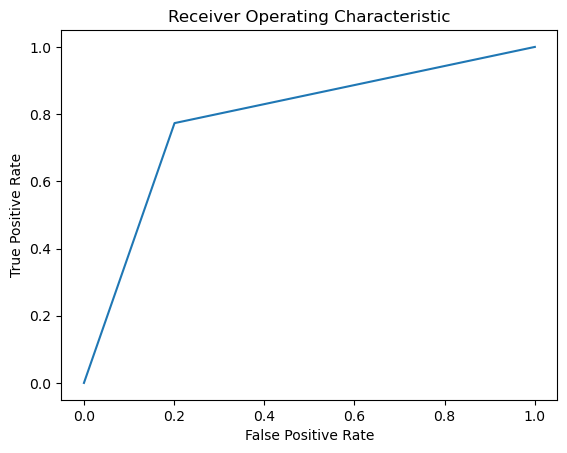

In [169]:
# Plot ROC Curve

plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Observation:
            1. Decision Tree model - training and validation accuracy using kfold cross validation - 
                Training and Validation Accuracy - 75.24%
            2. Decision Tree model with kfold cross validation - Testing Accuracy - 78.78%
            3. Decision Tree model is neither overfitted nor underfitted

## Random Forest Tree Classifier

In [170]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

In [171]:
kfold = KFold(n_splits = 5, shuffle = True)

In [172]:
random_clf = RandomForestClassifier()

In [173]:
scores2 = cross_val_score(random_clf, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores2

array([0.84864865, 0.85326087, 0.81521739, 0.875     , 0.81521739])

In [174]:
print(np.mean(scores2))

0.8414688601645123


In [175]:
random_clf.fit(x_train, y_train)

RandomForestClassifier()

In [176]:
# to check the confusion matrix

y_pred2 = random_clf.predict(x_test)
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[201,  23],
       [ 45, 127]], dtype=int64)

In [177]:
random_clf.score(x_test, y_test)

0.8282828282828283

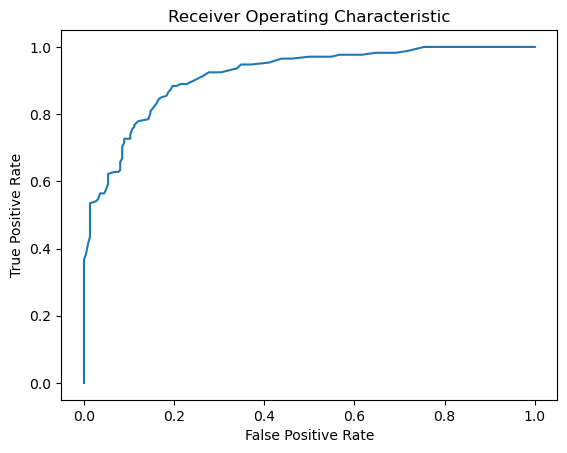

In [178]:
# Predicted probabilities
random_clf_y_test_prob = random_clf.predict_proba(x_test)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test, random_clf_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Observation:
            1. Random Forest Tree - training and validation accuracy using kfold cross validation - 
                84.14%
            2. Random Forest Tree with kfold cross validation - Testing Accuracy - 82.82%
            3. Random Forest Tree model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

## Extra Tree Classifier

In [179]:
from sklearn.ensemble import ExtraTreesClassifier

ETC = ExtraTreesClassifier()

In [180]:
kfold = KFold(n_splits = 5, shuffle = True)

In [181]:
scores3 = cross_val_score(ETC, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores3

array([0.85945946, 0.82608696, 0.80434783, 0.80434783, 0.85326087])

In [182]:
print(np.mean(scores3))

0.8295005875440659


In [183]:
ETC.fit(x_train, y_train) 

ExtraTreesClassifier()

In [184]:
# to check the confusion matrix

y_pred3 = ETC.predict(x_test)
cm3 = confusion_matrix(y_test, y_pred3)
cm3

array([[201,  23],
       [ 46, 126]], dtype=int64)

In [185]:
ETC.score(x_test, y_test)

0.8257575757575758

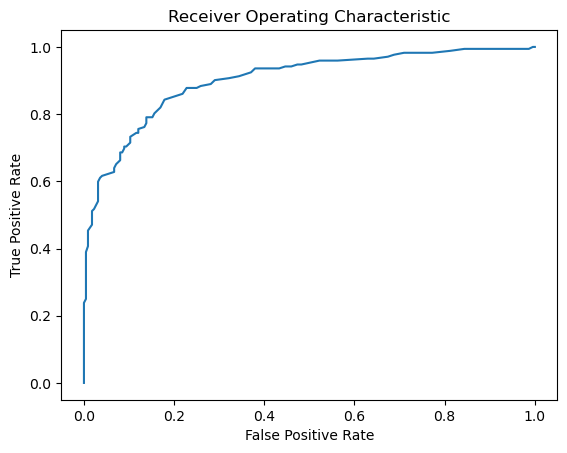

In [187]:
# Predicted probabilities
ETC_y_test_prob = ETC.predict_proba(x_test)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test, ETC_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
Observation:
            1. Extra Tree Model - training and validation accuracy using kfold cross validation - 
                82.95%
            2. Extra Tree with kfold cross validation - Testing Accuracy - 82.57%
            3. Extra Tree model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

## Logistic Regression Classifier

In [188]:
# creating train_test_split

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y1, test_size = 0.30, random_state = 41)

In [189]:
LR = LogisticRegression()

In [190]:
kfold = KFold(n_splits = 5, shuffle = True)

In [191]:
scores4 = cross_val_score(LR, x_train1, y_train1, cv = kfold, scoring = 'accuracy')
scores4

array([0.79459459, 0.79891304, 0.79891304, 0.73913043, 0.85869565])

In [192]:
print(np.mean(scores4))

0.7980493537015276


In [193]:
LR.fit(x_train1, y_train1) 

LogisticRegression()

In [194]:
# to check the confusion matrix

y_pred4 = LR.predict(x_test1)
cm4 = confusion_matrix(y_test1, y_pred4)
cm4

array([[182,  42],
       [ 43, 129]], dtype=int64)

In [195]:
LR.score(x_test1, y_test1)

0.7853535353535354

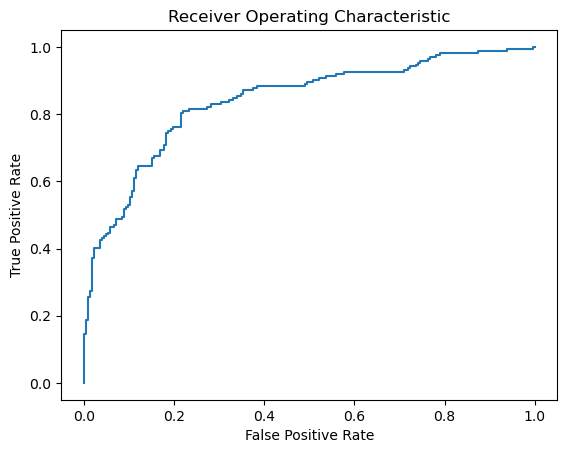

In [196]:
# Predicted probabilities
LR_y_test_prob = LR.predict_proba(x_test1)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test1, LR_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Observation:
            1. Logistic Regression model - training and validation accuracy using kfold cross 
               validation - 79.80%
            2. Logistic Regression with kfold cross validation - Testing Accuracy - 78.53%
            3. Logistic Regression model is neither overfitted nor underfitted

## KNN Classifier

In [197]:
kfold = KFold(n_splits = 5, shuffle = True)

In [198]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [199]:
scores5 = cross_val_score(knn, x_train1, y_train1, cv = kfold, scoring = 'accuracy')
scores5

array([0.75675676, 0.72826087, 0.76630435, 0.76086957, 0.77717391])

In [200]:
print(np.mean(scores5))

0.7578730904817862


In [201]:
knn.fit(x_train1, y_train1)

KNeighborsClassifier()

In [202]:
# to check the confusion matrix

y_pred5 = knn.predict(x_test1)
cm5 = confusion_matrix(y_test1, y_pred5)
cm5

array([[176,  48],
       [ 38, 134]], dtype=int64)

In [203]:
knn.score(x_test1, y_test1)

0.7828282828282829

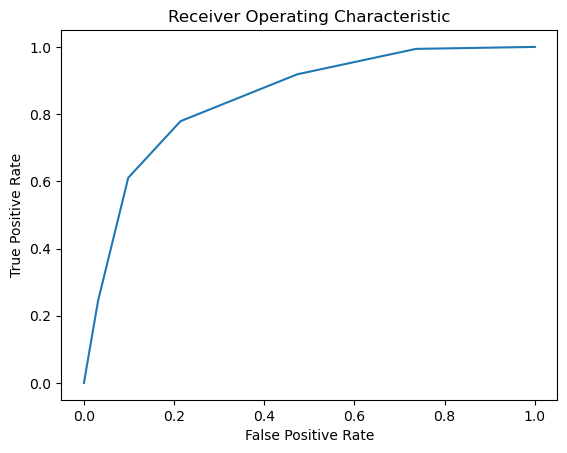

In [204]:
# Predicted probabilities
knn_y_test_prob = knn.predict_proba(x_test1)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test1, knn_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
Observation:
            1. KNN Classifier model - training and validation accuracy using kfold cross 
               validation - 75.78%
            2. KNN Classifier with kfold cross validation - Testing Accuracy - 78.28%
            3. KNN Classifier model is neither overfitted nor underfitted

## Gradient Boosting Classifier

In [205]:
from sklearn.ensemble import GradientBoostingClassifier

In [206]:
GB = GradientBoostingClassifier()

In [207]:
kfold = KFold(n_splits = 5, shuffle = True)

In [208]:
scores6 = cross_val_score(GB, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores6

array([0.77837838, 0.80978261, 0.83152174, 0.84782609, 0.83152174])

In [209]:
print(np.mean(scores6))

0.8198061104582843


In [210]:
GB.fit(x_train, y_train)

GradientBoostingClassifier()

In [211]:
# to check the confusion matrix

y_pred6 = GB.predict(x_test)
cm6 = confusion_matrix(y_test, y_pred6)
cm6

array([[199,  25],
       [ 43, 129]], dtype=int64)

In [212]:
GB.score(x_test, y_test)

0.8282828282828283

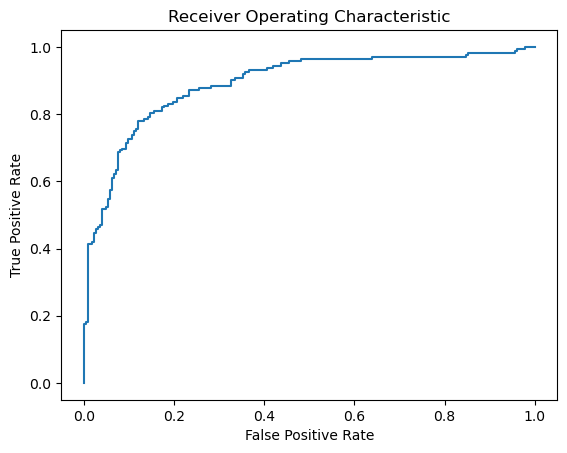

In [213]:
# Predicted probabilities
GB_y_test_prob = GB.predict_proba(x_test)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test, GB_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
Observation:
            1. Gradient Boosting Classifier model - training and validation accuracy using kfold cross 
               validation - 81.98%
            2. Gradient Boosting Classifier with kfold cross validation - Testing Accuracy - 82.82%
            3. Gradient Boosting Classifier model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

## AdaBoost Classifier

In [214]:
from sklearn.ensemble import AdaBoostClassifier

In [215]:
ADA = AdaBoostClassifier()

In [216]:
kfold = KFold(n_splits = 5, shuffle = True)
scores7 = cross_val_score(ADA, x_train, y_train, cv = kfold, scoring = 'accuracy')
scores7

array([0.84324324, 0.77717391, 0.80434783, 0.875     , 0.75543478])

In [217]:
print(np.mean(scores7))

0.8110399529964747


In [218]:
ADA.fit(x_train, y_train)

AdaBoostClassifier()

In [219]:
# to check the confusion matrix

y_pred7 = ADA.predict(x_test)
cm7 = confusion_matrix(y_test, y_pred7)
cm7

array([[196,  28],
       [ 52, 120]], dtype=int64)

In [220]:
ADA.score(x_test, y_test)

0.797979797979798

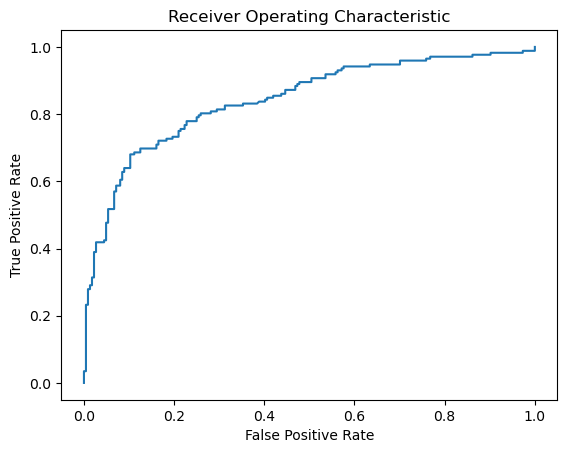

In [222]:
# Predicted probabilities
ADA_y_test_prob = ADA.predict_proba(x_test)[:, 1]

# True and False Positive rates
fpr, tpr, threshold = roc_curve(y_test, ADA_y_test_prob)

# Plot ROC Curve
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
Observation:
            1. AdaBoost Classifier model - training and validation accuracy using kfold cross 
               validation - 81.10%
            2. AdaBoost Classifier with kfold cross validation - Testing Accuracy - 79.79%
            3. AdaBoost Classifier model is neither overfitted nor underfitted
            4. Therefore it has - Low Bias and Low Variance

In [ ]:
Final Observations: 
            1. Decision Tree model with kfold cross validation - 78.78%
            2. Random Forest Tree model with kfold cross validation - 82.82%
            3. Extra Tree model with kfold cross validation - 82.57%
            4. Logistic Regression model with kfold cross validation - 78.53%
            5. KNN Classifier model with kfold cross validation - 78.28%
            6. Gradient Boosting Classifier with kfold cross validation - Testing Accuracy - 82.82%
            7. AdaBoost Classifier with kfold cross validation - Testing Accuracy - 79.79%
            5. We can chose Random Forest Tree or Gradient Boosting model for hyper tuning

## HyperParameter Tuning for Random Forest Tree model as its accuracy is better 82.82%

In [223]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion': ['gini', 'entropy'], 'random_state': [10, 50, 100, 1000], 'max_depth': [0, 10, 20, 25],
             'n_jobs': [-3, -2, -1, 1], 'n_estimators': [25, 50, 100, 200, 300]}


In [224]:
kfold = KFold(n_splits = 5, shuffle = True)

In [225]:
grid_search = GridSearchCV(estimator = random_clf, param_grid = parameters, scoring = 'accuracy', cv = kfold)

In [226]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20, 25],
                         'n_estimators': [25, 50, 100, 200, 300],
                         'n_jobs': [-3, -2, -1, 1],
                         'random_state': [10, 50, 100, 1000]},
             scoring='accuracy')

In [227]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 50,
 'n_jobs': -3,
 'random_state': 100}

## Retrain the model with the hyperparameters

In [228]:
random_clf_final_model = RandomForestClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 50, n_jobs = -3,
 random_state = 100)

In [229]:
random_clf_final_model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=50,
                       n_jobs=-3, random_state=100)

In [230]:
grid_search.best_score_

0.8458343125734432

In [231]:
random_clf_final_model.score(x_test, y_test)

0.8383838383838383

In [ ]:
Observation:
            1. Random Forest Tree model with hypertuning - accuracy -  83.83%
            2. Random Forest Tree model without hypertuning - accuracy - 82.82%
            3. We will choose Random Forest Tree model with hypertuning for prediction of the data

## Save the Model

In [232]:
# use Random Forest Classifier and the save the model as it has good testing accuracy

import pickle
pickle.dump(random_clf_final_model, open('Insurance_Claim_Fraud_Detection.pkl', 'wb'))

## prediction using the saved model

In [233]:
loaded_model = pickle.load(open('Insurance_Claim_Fraud_Detection.pkl', 'rb'))
prediction_saved_model = loaded_model.predict(x_test)
prediction_saved_model

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [234]:
print(y_test)

79      1
1158    1
631     0
707     1
492     0
       ..
628     1
518     0
961     0
912     1
156     0
Name: fraud_reported, Length: 396, dtype: int32


In [235]:
# comparing the predicted and actual values

a = np.array(y_test)
df1 = pd.DataFrame()
df1['Predicted'] = prediction_saved_model
df1['Original'] = a
df1

,Predicted,Original
0,1,1
1,1,1
2,0,0
3,0,1
4,1,0
...,...,...
391,1,1
392,0,0
393,0,0
394,1,1


Observation:
            1. Almost all actual and predicted values match
            2. This Census_Income_Model.pkl can be used to predict whether an insurance claim is 
               fraudulent or not. 

Observation:
            1. Decision Tree model with kfold cross validation - 78.78%
            2. Random Forest Tree model with kfold cross validation - 82.82%
            3. Extra Tree model with kfold cross validation - 82.57%
            4. Logistic Regression model with kfold cross validation - 78.53%
            5. KNN Classifier model with kfold cross validation - 78.28%
            6. Gradient Boosting Classifier with kfold cross validation - Testing Accuracy - 82.82%
            7. AdaBoost Classifier with kfold cross validation - Testing Accuracy - 79.79%     
            8. Random Forest Tree model with hypertuning - Testing accuracy -  83.83%
            9. Comparing all the Classifiers - Random Forest Tree model with hypertuning has the
               good accuracy and our model is also free from overfitting/underfitting problem